In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10, 10)})

In [2]:
columns = ['id','entity', 'label', 'tweet']
tweets_df = pd.read_csv('datasets/twitter_training.csv', names=columns, header=None)
tweets_df.sample(10)

,id,entity,label,tweet
28810,556,ApexLegends,Neutral,With Thank you guys for supporting my streams....
58077,11558,TomClancysRainbowSix,Negative,@Rainbow6Game Server are Available in Xbox 🥺
72492,8819,Nvidia,Negative,See this is why people need to wait and shit.....
63072,7612,MaddenNFL,Negative,This looks fucking trash lmao
33706,6589,Fortnite,Negative,Just about switched from @FortniteGame to @MWM...
37055,8355,Microsoft,Negative,Just had to upgrade this phone... Microsoft Te...
25591,4793,Google,Negative,Imagine my shock.
47976,5836,HomeDepot,Negative,What an idiot lmaooo
12063,8474,NBA2K,Negative,CONFESSION: I am embarrassed to say I have bee...
15762,3097,Dota2,Irrelevant,Like I said I REALLY hope this paves the way f...


In [3]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report, cohen_kappa_score

def print_results(y_true, y_pred):
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print('F1-score:', f1_score(y_true, y_pred, average='macro'))
    print('cohen_kappa_score:', cohen_kappa_score(y_true, y_pred))

In [4]:
tweets_df_validation = pd.read_csv('datasets/twitter_validation.csv',  names=columns, header=None)
tweets_df_validation.sample(10)

,id,entity,label,tweet
81,4177,CS-GO,Positive,To all the people who want to play VALORANT an...
872,6640,Fortnite,Irrelevant,My advice when you suck like me \n#Fortnite\n#...
257,4895,GrandTheftAuto(GTA),Negative,I can't stand your ass OMG!
672,6890,johnson&johnson,Negative,They had a lawsuit over the opiates and the ba...
698,10007,PlayerUnknownsBattlegrounds(PUBG),Negative,@PUBG PLEASE SORT OUT THE GAME CRASHES!
89,11175,TomClancysGhostRecon,Neutral,GM Fam!!! hope you are all up and being great ...
364,8917,Nvidia,Neutral,Shipped first GPU-enabled production code thro...
49,13197,Xbox(Xseries),Neutral,This could go very well...or horribly wrong.
541,4851,GrandTheftAuto(GTA),Positive,I get freaky on that gta bmx bike #PS4share\n\...
316,11533,TomClancysRainbowSix,Neutral,"Quick 4k, \n#rainbowsixsiege #rainbowsix #rank..."


In [5]:
tweets_df = pd.concat([tweets_df, tweets_df_validation])

In [6]:
tweets_df.shape

(75682, 4)

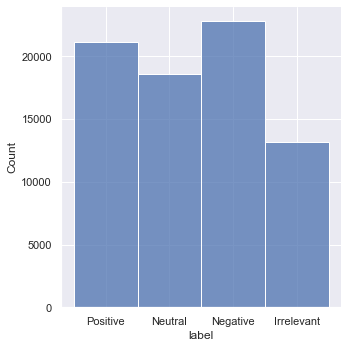

In [7]:
sns.displot(tweets_df['label'])

In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      75682 non-null  int64 
 1   entity  75682 non-null  object
 2   label   75682 non-null  object
 3   tweet   74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [9]:
tweets_df.dropna(inplace=True)

In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74996 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74996 non-null  int64 
 1   entity  74996 non-null  object
 2   label   74996 non-null  object
 3   tweet   74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [11]:

entity_onehot = pd.get_dummies(tweets_df['entity'])
tweets_df = tweets_df.join(entity_onehot)
tweets_df.head()

,id,entity,label,tweet,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,Overwatch,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
import re

def clean_text(x):
    pattern = r'[^a-z0-9\s]'
    x = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: x.lower())
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: clean_text(x))
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: clean_numbers(x))
tweets_df['tweet'] = tweets_df['tweet'].apply(lambda x: replace_contractions(x))

In [13]:
count_words = tweets_df['tweet'].str.findall(r'(\w+)').str.len()
print(count_words.sum())

1408860


In [14]:
import re
from nltk.corpus import stopwords

tweets = tweets_df['tweet']
# .str.lower()
# tweets = tweets_df['tweet'].apply(lambda x : re.sub('[^a-z\s]','',x) )
# tweets = tweets.str.replace('#', ' ')
tweets = tweets.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
stopwords = set(stopwords.words('english'))
tweets = tweets.apply(lambda x : ' '.join(word for word in x.split() if word not in stopwords ))

count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

804056


In [15]:
most_freq_words = pd.Series(' '.join(tweets).lower().split()).value_counts()[:20]
tweets = tweets.apply(lambda x : ' '.join(word for word in x.split() if word not in most_freq_words ))
print(most_freq_words)

count_words = tweets.str.findall(r'(\w+)').str.len()
print(count_words.sum())

game       8381
like       5134
####       4260
get        4127
one        3734
good       3700
play       3588
love       3449
really     3403
new        3360
time       3069
people     2966
johnson    2962
###        2914
see        2874
cant       2866
shit       2844
dont       2792
best       2626
still      2539
dtype: int64
739642


In [16]:
from collections import Counter
from itertools import chain

v = tweets.str.split().tolist() 
c = Counter(chain.from_iterable(v))
tweets = [' '.join([j for j in i if c[j] > 1]) for i in v]

total_word = 0
for x,word in enumerate(tweets):
    num_word = len(word.split())
    total_word = total_word + num_word
print(total_word)

726155


In [17]:
import spacy
import spacy.cli

spacy.cli.download('en_core_web_lg')
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [18]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [19]:
document = nlp.pipe(tweets)
tweets_vector = np.array([tweet.vector for tweet in document])
print(tweets_vector.shape)

(76988, 300)


In [20]:
y = tweets_df['label']

labels = set(tweets_df['label'])
class_to_index = {'Neutral':0, 'Irrelevant':0, 'Negative':1, 'Positive': 2}
index_to_class = dict((v,k) for k, v in class_to_index.items())
names_to_ids = lambda y: np.array([class_to_index.get(x) for x in tweets_df['label']])
ids_to_names = lambda y: np.array([index_to_class.get(x) for x in y])
train_labels = names_to_ids(y)
tweets_df['numeric_label'] = train_labels
tweets_df.head()

,id,entity,label,tweet,Amazon,ApexLegends,AssassinsCreed,Battlefield,Borderlands,CS-GO,...,PlayStation5(PS5),PlayerUnknownsBattlegrounds(PUBG),RedDeadRedemption(RDR),TomClancysGhostRecon,TomClancysRainbowSix,Verizon,WorldOfCraft,Xbox(Xseries),johnson&johnson,numeric_label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
0,3364,Facebook,Irrelevant,i mentioned on facebook that i was struggling ...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0,3364,Facebook,Irrelevant,i mentioned on facebook that i was struggling ...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2401,Borderlands,Positive,i am coming to the borders and i will kill you...,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2


In [21]:
tweets_df.shape

(76988, 37)

In [22]:
X = np.concatenate((tweets_vector, tweets_df.iloc[:, 4:-1].to_numpy()), axis=1)
X.shape

(76988, 332)

In [23]:
y.shape

(76988,)

In [24]:
X = np.concatenate((tweets_vector, tweets_df.iloc[:, 4:-1].to_numpy()), axis=1)
y = train_labels

from sklearn.model_selection import train_test_split

X_train,X_val, y_train, y_val = train_test_split(X,y, stratify=y, test_size=0.2, random_state=1)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((61590, 332), (15398, 332), (61590,), (15398,))

In [25]:
X.shape

(76988, 332)

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
print(model.score(X_train, y_train))

0.6257996427991557


In [27]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.6162488634887647


In [28]:
print_results(y_val, y_pred)

[[4480 1056  920]
 [1404 2788  424]
 [1640  465 2221]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      6456
           1       0.65      0.60      0.62      4616
           2       0.62      0.51      0.56      4326

    accuracy                           0.62     15398
   macro avg       0.62      0.60      0.61     15398
weighted avg       0.62      0.62      0.61     15398

F1-score: 0.609532426832453
cohen_kappa_score: 0.4061338549706305


In [29]:
from sklearn.neural_network import MLPClassifier
mlp_ad = MLPClassifier(solver='adam')
mlp_ad.fit(X_train, y_train)

y_pred = mlp_ad.predict(X_val)
print_results(y_val, y_pred)

[[5686  365  405]
 [ 448 3930  238]
 [ 496  213 3617]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      6456
           1       0.87      0.85      0.86      4616
           2       0.85      0.84      0.84      4326

    accuracy                           0.86     15398
   macro avg       0.86      0.86      0.86     15398
weighted avg       0.86      0.86      0.86     15398

F1-score: 0.8576729851272386
cohen_kappa_score: 0.7850043773456953


In [30]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()
# parallel tree boosting
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_val)
print_results(y_val, y_pred)

[14:46:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[5501  507  448]
 [ 752 3618  246]
 [ 873  272 3181]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      6456
           1       0.82      0.78      0.80      4616
           2       0.82      0.74      0.78      4326

    accuracy                           0.80     15398
   macro avg       0.81      0.79      0.80     15398
weighted avg       0.80      0.80      0.80     15398

F1-score: 0.7962140330269366
cohen_kappa_score: 0.6903068901806368


In [31]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=37)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)
print_results(y_val, y_pred)

[[5730  290  436]
 [3770  640  206]
 [3367  240  719]]
              precision    recall  f1-score   support

           0       0.45      0.89      0.59      6456
           1       0.55      0.14      0.22      4616
           2       0.53      0.17      0.25      4326

    accuracy                           0.46     15398
   macro avg       0.51      0.40      0.36     15398
weighted avg       0.50      0.46      0.39     15398

F1-score: 0.35571888223697384
cohen_kappa_score: 0.10367519283890592


In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)

print(dict(zip(y, labels)))

{2: 2, 0: 1, 1: 2}


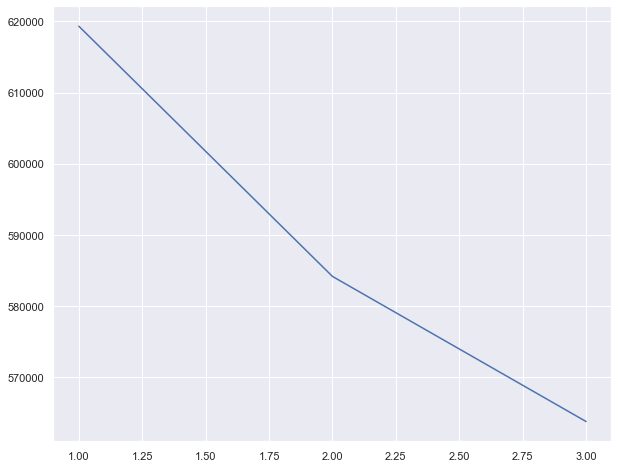

In [34]:
crit = []
for k in range(1, 4):
    kmeans = KMeans(n_clusters=k, random_state=15)
    kmeans.fit(X)
    crit.append(kmeans.inertia_)
    
plt.plot(range(1, 4), crit)
plt.show()

In [41]:
pca = PCA(n_components=4)
pca.fit(X)
Z = pca.transform(X)
print(Z)
pca.explained_variance_ratio_.cumsum()

[[-0.04701282  0.36503705 -0.9222055   0.25742328]
 [-0.05856059  0.3514688  -0.9068636   0.28009725]
 [-0.50530183  0.21279708 -0.28413144 -0.32956037]
 ...
 [-0.31641313 -0.28702354  0.16181228  0.9198137 ]
 [-0.5132958  -0.14151889  0.19212495  0.852669  ]
 [-0.4141489  -0.41186464  0.18502891  0.8583288 ]]


array([0.09279166, 0.16407701, 0.20110354, 0.23437514])

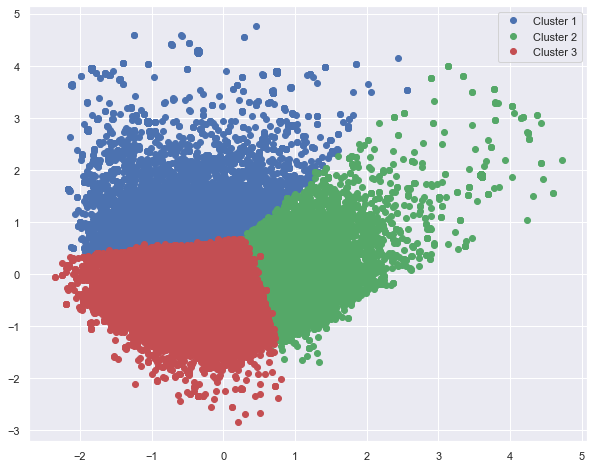

In [43]:
plt.plot(Z[labels == 0, 0], Z[labels == 0, 1], 'bo', label='Cluster 1')
plt.plot(Z[labels == 1, 0], Z[labels == 1, 1], 'go', label='Cluster 2')
plt.plot(Z[labels == 2, 0], Z[labels == 2, 1], 'ro', label='Cluster 3')
# plt.plot(Z[labels == 3, 0], Z[labels == 3, 1], 'co', label='Cluster 4')
plt.legend(loc=0)

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1)
Z = tsne.fit_transform(X)
print(Z)

[[-16.413746    5.333167 ]
 [-16.414282    5.338722 ]
 [ -8.001974    1.7282969]
 ...
 [ -9.159874  -48.10951  ]
 [ -9.170505  -48.132736 ]
 [ -9.15617   -48.08448  ]]


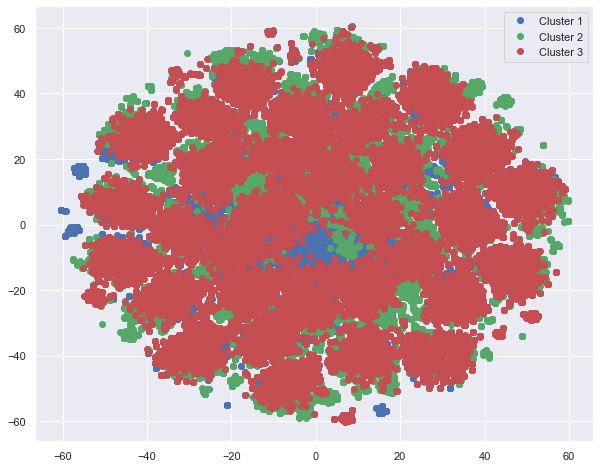

In [38]:
plt.plot(Z[labels == 0, 0], Z[labels == 0, 1], 'bo', label='Cluster 1')
plt.plot(Z[labels == 1, 0], Z[labels == 1, 1], 'go', label='Cluster 2')
plt.plot(Z[labels == 2, 0], Z[labels == 2, 1], 'ro', label='Cluster 3')
plt.legend(loc=0)

In [39]:
# tweets_df[['entity', 'numeric_label', 'tweet']].to_csv('prepared_data.csv', index=False)

In [40]:
# tweets_df_validation[['entity', 'numeric_label', 'tweet']].to_csv('prepared_data_test.csv', index=False)